In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3419_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4176_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3370_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1255_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/660_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/484_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4221_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2396_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/543_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3017_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1482_left.jpg
/kaggle/input/ocular-disease-recognit

In [2]:
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


In [3]:
dc = df.copy()

In [4]:
string_labels = []
for each in dc.labels:
    if(len(each)==5):
        string_labels.append(each[2])
    else:
        print(each)

dc = pd.concat([dc, pd.DataFrame(string_labels, columns = ['Labels'])], axis=1)

In [5]:
dc.drop(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 
         'Right-Fundus', 'Left-Diagnostic Keywords', 
         'Right-Diagnostic Keywords', 'filepath', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels', 'target'], axis=1, inplace=True)

In [6]:
dc.head(3)

,filename,Labels
0,0_right.jpg,N
1,1_right.jpg,N
2,2_right.jpg,D


In [7]:
def has_N(text):
    if "N" in text:
        return 1
    else:
        return 0
        
def has_D(text):
    if "D" in text:
        return 1
    else:
        return 0
    
    
def has_G(text):
    if "G" in text:
        return 1
    else:
        return 0
    
    
def has_C(text):
    if "C" in text:
        return 1
    else:
        return 0
    
    
def has_A(text):
    if "A" in text:
        return 1
    else:
        return 0
    
    
def has_H(text):
    if "H" in text:
        return 1
    else:
        return 0
    
    
def has_M(text):
    if "M" in text:
        return 1
    else:
        return 0
    
    
def has_O(text):
    if "O" in text:
        return 1
    else:
        return 0

In [8]:
dc["N"] = dc["Labels"].apply(lambda x: has_N(x))
dc["D"] = dc["Labels"].apply(lambda x: has_D(x))
dc["G"] = dc["Labels"].apply(lambda x: has_G(x))
dc["C"] = dc["Labels"].apply(lambda x: has_C(x))
dc["A"] = dc["Labels"].apply(lambda x: has_A(x))
dc["H"] = dc["Labels"].apply(lambda x: has_H(x))
dc["M"] = dc["Labels"].apply(lambda x: has_M(x))
dc["O"] = dc["Labels"].apply(lambda x: has_O(x))

In [9]:
dc.head(3)

,filename,Labels,N,D,G,C,A,H,M,O
0,0_right.jpg,N,1,0,0,0,0,0,0,0
1,1_right.jpg,N,1,0,0,0,0,0,0,0
2,2_right.jpg,D,0,1,0,0,0,0,0,0


In [10]:
#Diabetes (D),
#Glaucoma (G),
#Cataract (C),
#Age related Macular Degeneration (A),
#Hypertension (H),
#Pathological Myopia (M),
#Other diseases/abnormalities (O)

In [11]:
normal = dc.loc[(dc.N == 1)]["filename"].values
diabetes = dc.loc[(dc.D == 1)]["filename"].values
glaucoma = dc.loc[(dc.G == 1)]["filename"].values
cataract = dc.loc[(dc.C == 1)]["filename"].values
mDegen = dc.loc[(dc.A == 1)]["filename"].values
hypert = dc.loc[(dc.H == 1)]["filename"].values
myopia = dc.loc[(dc.M == 1)]["filename"].values
other = dc.loc[(dc.O == 1)]["filename"].values
normal[:15]

array(['0_right.jpg', '1_right.jpg', '8_right.jpg', '10_right.jpg',
       '29_right.jpg', '31_right.jpg', '35_right.jpg', '37_right.jpg',
       '38_right.jpg', '47_right.jpg', '49_right.jpg', '61_right.jpg',
       '65_right.jpg', '66_right.jpg', '73_right.jpg'], dtype=object)

In [12]:
print("Number of images in normal: {}".format(len(normal)))
print("Number of images in diabetes: {}".format(len(diabetes)))
print("Number of images in glaucoma: {}".format(len(glaucoma)))
print("Number of images in cataract: {}".format(len(cataract)))
print("Number of images in mDegen: {}".format(len(mDegen)))
print("Number of images in hypert: {}".format(len(hypert)))
print("Number of images in myopia: {}".format(len(myopia)))
print("Number of images in other: {}".format(len(other)))

Number of images in normal: 2873
Number of images in diabetes: 1608
Number of images in glaucoma: 284
Number of images in cataract: 293
Number of images in mDegen: 266
Number of images in hypert: 128
Number of images in myopia: 232
Number of images in other: 708


In [13]:
print(len(normal))

2873


In [14]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2
import random
from tqdm import tqdm
def create_dataset(image_category,label):
    dataset_dir = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/"
    image_size=224
    labels = []
    dataset = []
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
        

In [15]:
norm = create_dataset(normal,1)
dia = create_dataset(diabetes,1)
glau = create_dataset(glaucoma,1)
catar = create_dataset(cataract,1)
mDeg = create_dataset(mDegen,1)
hype = create_dataset(hypert,1)
myopi = create_dataset(myopia,1)
oth = create_dataset(other,1)

100%|██████████| 708/708 [00:09<00:00, 71.28it/s]


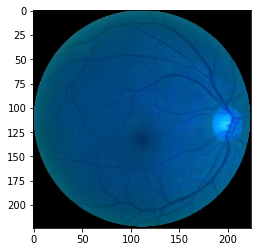

In [16]:
import matplotlib.pyplot as plt
sample = random.choice(range(len(dia)))
image = dia[sample][0]
plt.imshow(image)

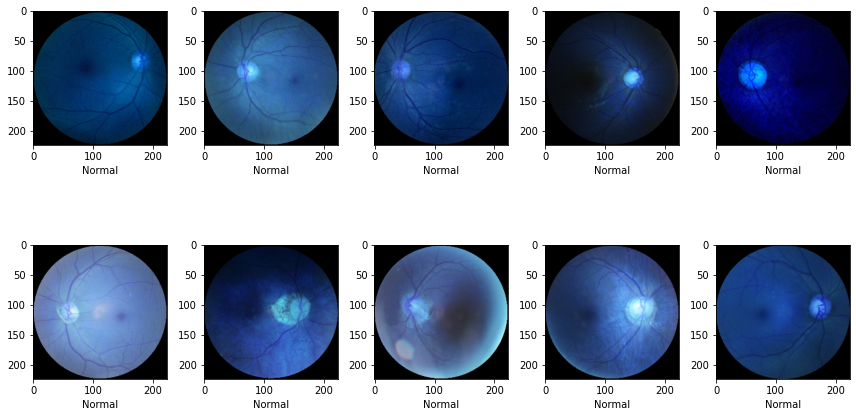

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(norm)))
    image = norm[sample][0]
    category = norm[sample][1]
    label = "Normal"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

In [18]:
len(oth)

708

In [19]:
#Normal (N)
#Diabetes (D),
#Glaucoma (G),
#Cataract (C),
#Age related Macular Degeneration (A),
#Hypertension (H),
#Pathological Myopia (M),
#Other diseases/abnormalities (O)

In [20]:
#import shutil
#shutil.rmtree("/kaggle/working/Normal")

In [21]:
def extractImg(arr,path):
    cnt = 0
    for i in arr:
        imgs = Image.fromarray(i[0])
        image = imgs.save(f"{path}/image"+str(cnt)+".png")
        cnt += 1
        
def getImgPath(text):
    strs = '/kaggle/working/'
    strs += text
    return strs

In [22]:
paths = ['Normal', 'Diabetes', 'Glaucoma' , 'Cataract' , 'AgeDegeneration' , 'Hypertension' , 'Myopia' , 'Others']
imgList = [norm, dia, glau, catar, mDeg, hype, myopi, oth]

for i in range(8):
    path = getImgPath(paths[i])
    os.makedirs(path)
    extractImg(imgList[i], path)
